## Classification Example

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [3]:
df=pd.read_csv(r'car_evaluation.csv')

In [34]:
df.shape

(1727, 7)

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class_1']

In [6]:
df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class_1']

In [7]:
df

,buying,maint,doors,persons,lug_boot,safety,class_1
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [8]:
df.buying.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [9]:
df.maint.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [10]:
df.doors.unique()

array(['2', '3', '4', '5more'], dtype=object)

In [11]:
df.persons.unique()

array(['2', '4', 'more'], dtype=object)

In [12]:
df.lug_boot.unique()

array(['small', 'med', 'big'], dtype=object)

In [13]:
df.safety.unique()

array(['med', 'high', 'low'], dtype=object)

In [14]:
df.class_1.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [15]:
X = df.drop(['class_1'], axis=1)

y = df['class_1']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 5)

In [19]:
#!pip install category_encoders

In [17]:
import category_encoders as ce

In [18]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [19]:
X_train

,buying,maint,doors,persons,lug_boot,safety
1608,1,1,1,1,1,1
1327,1,2,2,2,2,2
93,2,2,1,1,2,1
1289,3,3,1,3,2,3
494,4,2,3,1,3,3
...,...,...,...,...,...,...
1424,1,4,4,3,2,3
1142,3,1,3,1,3,3
998,3,4,2,2,3,3
206,2,4,1,3,3,3


In [20]:
from sklearn.tree import DecisionTreeClassifier

# Gini

In [21]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=5)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [22]:
y_pred_gini = clf_gini.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8066


In [24]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['acc', 'unacc', 'acc', ..., 'unacc', 'unacc', 'unacc'],
      dtype=object)

In [25]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7879


In [26]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7879
Test set score: 0.8066


[Text(0.625, 0.875, 'X[5] <= 2.5\ngini = 0.44\nsamples = 1122\nvalue = [238, 36, 803, 45]'),
 Text(0.5, 0.625, 'X[3] <= 2.5\ngini = 0.567\nsamples = 739\nvalue = [238, 36, 420, 45]'),
 Text(0.25, 0.375, 'X[3] <= 1.5\ngini = 0.479\nsamples = 489\nvalue = [116, 19, 332, 22]'),
 Text(0.125, 0.125, 'gini = 0.633\nsamples = 244\nvalue = [116, 19, 87, 22]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 245\nvalue = [0, 0, 245, 0]'),
 Text(0.75, 0.375, 'X[4] <= 2.5\ngini = 0.625\nsamples = 250\nvalue = [122, 17, 88, 23]'),
 Text(0.625, 0.125, 'gini = 0.611\nsamples = 168\nvalue = [93, 11, 41, 23]'),
 Text(0.875, 0.125, 'gini = 0.541\nsamples = 82\nvalue = [29, 6, 47, 0]'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 383\nvalue = [0, 0, 383, 0]')]

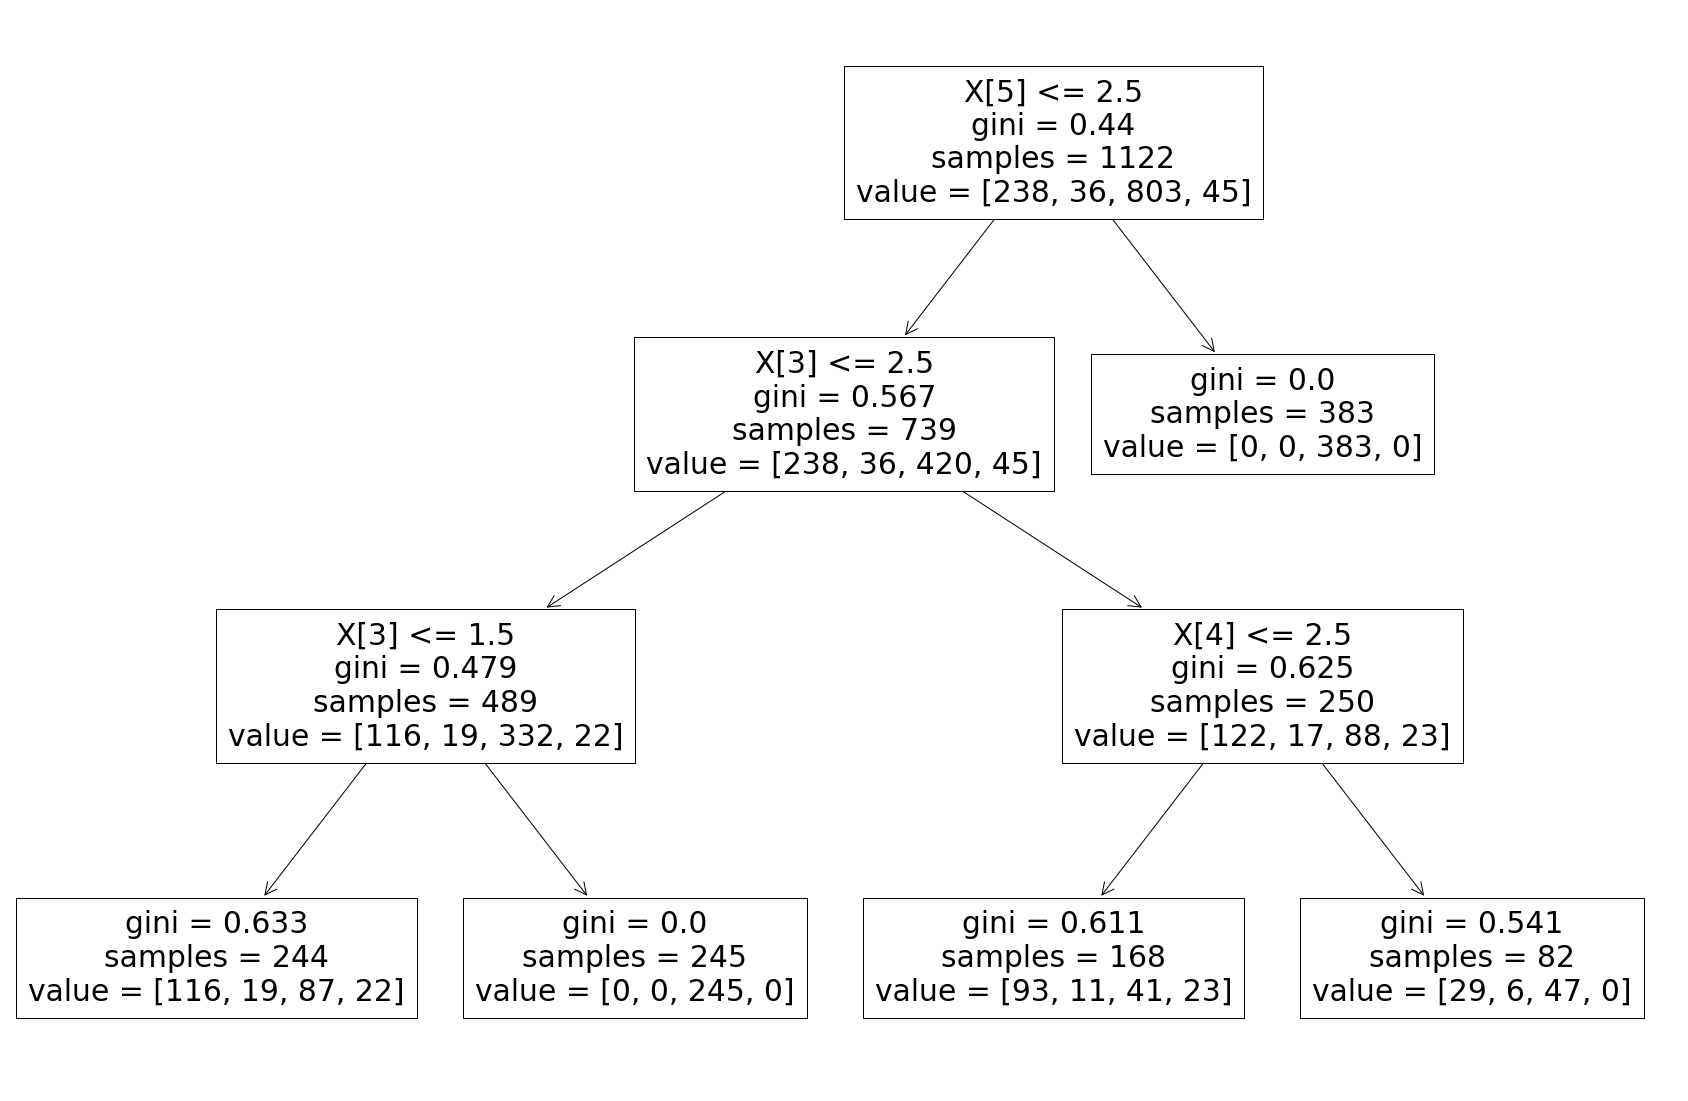

In [30]:
plt.figure(figsize=(30,20))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [31]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[130   0  16   0]
 [ 30   0   3   0]
 [ 48   0 358   0]
 [ 20   0   0   0]]


# Entropy

In [27]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [28]:
y_pred_en = clf_en.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))


Model accuracy score with criterion entropy: 0.7669


In [30]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'unacc'],
      dtype=object)

In [31]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8155


In [32]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8155
Test set score: 0.7669


[Text(0.5625, 0.9166666666666666, 'X[5] <= 2.5\nentropy = 1.165\nsamples = 1122\nvalue = [238, 36, 803, 45]'),
 Text(0.5267857142857143, 0.75, 'X[0] <= 1.5\nentropy = 1.448\nsamples = 739\nvalue = [238, 36, 420, 45]'),
 Text(0.2857142857142857, 0.5833333333333334, 'X[5] <= 1.5\nentropy = 1.859\nsamples = 179\nvalue = [52, 24, 74, 29]'),
 Text(0.14285714285714285, 0.4166666666666667, 'X[1] <= 3.5\nentropy = 1.474\nsamples = 86\nvalue = [33, 14, 39, 0]'),
 Text(0.07142857142857142, 0.25, 'X[4] <= 2.5\nentropy = 1.498\nsamples = 60\nvalue = [16, 14, 30, 0]'),
 Text(0.03571428571428571, 0.08333333333333333, 'entropy = 1.529\nsamples = 38\nvalue = [8, 14, 16, 0]'),
 Text(0.10714285714285714, 0.08333333333333333, 'entropy = 0.946\nsamples = 22\nvalue = [8, 0, 14, 0]'),
 Text(0.21428571428571427, 0.25, 'X[3] <= 1.5\nentropy = 0.931\nsamples = 26\nvalue = [17, 0, 9, 0]'),
 Text(0.17857142857142858, 0.08333333333333333, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0, 0, 0]'),
 Text(0.25, 0.08333333

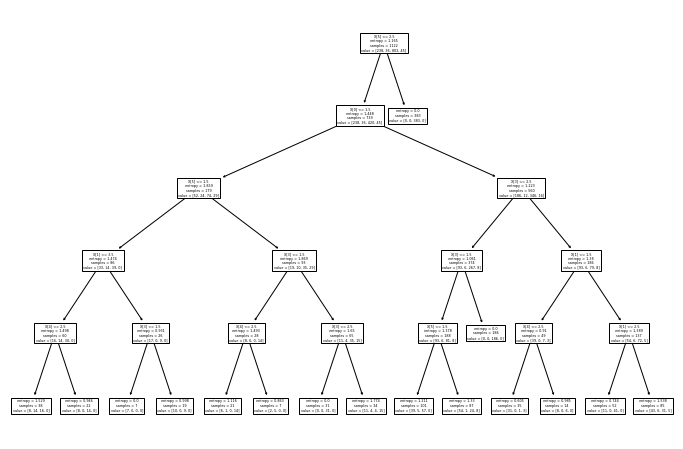

In [38]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 


In [39]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 87   6  45   8]
 [ 10   3  13   7]
 [ 42   0 364   0]
 [ 10   0   0  10]]


### Assignment:
1. Implement DT(Classification) on Loan PredictionData and insurance_data which is available in logistic reg.
2. Implement DT(Classification) on MoviesRatingData and FakeNews Data which is available inNB alogorithm and Compare the Accuracy.
3. Implement DT(Regression) on 50Startup and petrol Consumption from linearReg.